In [1]:
# Importing required libraries
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as cborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
drive.mount('/content/drive')    # Mounting the google drive

Mounted at /content/drive


In [5]:
# Opening the file & reading variables from it
path = '/content/drive/MyDrive/Colab_Works/ML/iris.csv'
iris_file = pd.read_csv(path)
X = iris_file.drop(['iris_class'], axis = 1)

# Encoding output variable classes
encode = LabelEncoder()
y = encode.fit_transform(iris_file['iris_class'])
iris_file['class_code'] = y
Y = iris_file['class_code']

print('Original dataset shape:', iris_file.shape, '\nInput dataset shape:', X.shape)

Original dataset shape: (150, 6) 
Input dataset shape: (150, 4)


(4, 4)
Shape of eigenvalues: (4,) 
Shape of eigenvectors: (4, 4)


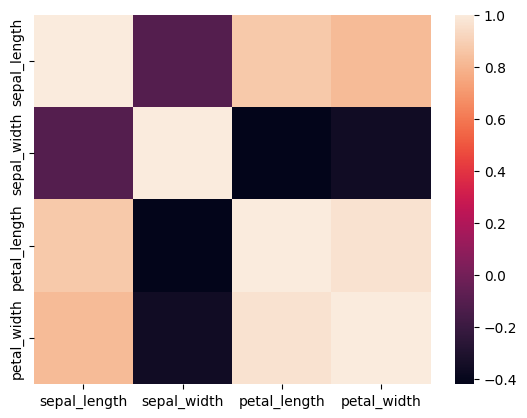

In [6]:
# Standardise the dataset
X_mean = X.mean();    X_SD = X.std();    Z = (X - X_mean) / X_SD

# Calculate the covariance matrix & plot its heatmap
cov = Z.cov()
print(cov.shape)
cborn.heatmap(cov)

# Calculate the eigenvalues & eigenvectors of covariance matrix
eg_values, eg_vectors = np.linalg.eig(cov)

print('Shape of eigenvalues:', eg_values.shape, '\nShape of eigenvectors:', eg_vectors.shape)

2
(4, 3)
                   PC1       PC2       PC3
sepal_length  0.522372 -0.372318 -0.721017
sepal_width  -0.263355 -0.925556  0.242033
petal_length  0.581254 -0.021095  0.140892
petal_width   0.565611 -0.065416  0.633801


<Axes: >

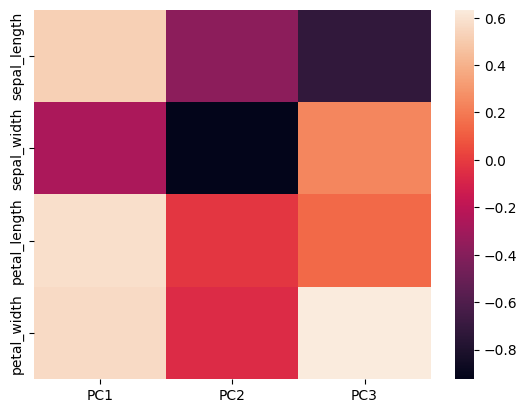

In [8]:
# Sort the eigenvalues & their corresdponding eigenvectors in descending order
order = eg_values.argsort()[::-1]
eg_values = eg_values[order];    eg_vectors = eg_vectors[:, order]

# Get the explained variance
exp_var = np.cumsum(eg_values) / np.sum(eg_values)

# Get the number of principal components (Those values with explained variance more than 80%)
pc_count = np.argmax(exp_var >= 0.8) + 1
print(pc_count)

# Get the PCs or Unit matrix & plot its heatmap
u = eg_vectors[:, :pc_count+1]
print(u.shape)

pc = pd.DataFrame(
    u,
    index = X.columns,
    columns = ['PC1', 'PC2', 'PC3']
)

print(pc)
cborn.heatmap(pc)

Text(0, 0.5, 'PCA2')

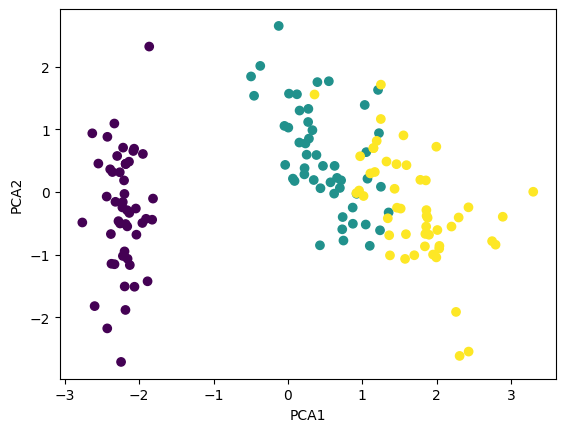

In [9]:
Z_pc = Z @ pc    # Dot product calculation

# Rename the columns
Z_pc.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis = 1, inplace = True)

# Plotting the dataset
plt.scatter(Z_pc['PCA1'], Z_pc['PCA2'], c = Y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

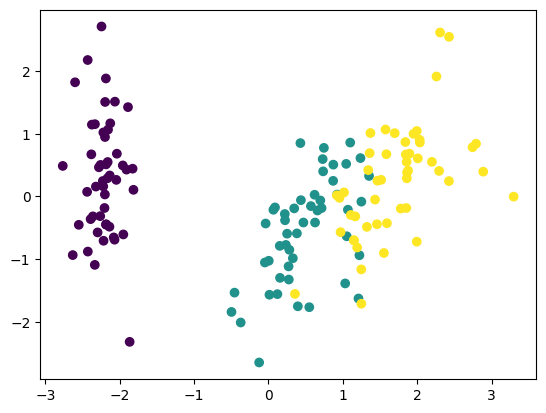

In [10]:
# Doing PCA using scikit-learn function
n_components = 3
pca = PCA(n_components = n_components);    pca_ = pca.fit(Z);    X_pca = pca_.transform(Z)

# Create a dataframe with the fitted data
pca_data = pd.DataFrame(
    X_pca,
    columns = [f'PC{i+1}' for i in range(n_components)]
)

# Plot the data
plt.scatter(pca_data['PC1'], pca_data['PC2'], c = Y)